In [1]:
import pandas as pd

# Load cleaned dataset
df = pd.read_csv("../data/processed/cleaned_ecommerce_sales_data.csv")

# Convert Order Date back to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

df.head()

,Order Date,Product Name,Category,Region,Quantity,Sales,Profit,Year,Month,Month Name,Quarter
0,2024-12-31,Printer,Office,North,4,3640,348.93,2024,12,December,2024Q4
1,2022-11-27,Mouse,Accessories,East,7,1197,106.53,2022,11,November,2022Q4
2,2022-05-11,Tablet,Electronics,South,5,5865,502.73,2022,5,May,2022Q2
3,2024-03-16,Mouse,Accessories,South,2,786,202.87,2024,3,March,2024Q1
4,2022-09-10,Mouse,Accessories,West,1,509,103.28,2022,9,September,2022Q3


In [2]:
# Top 10 products by Sales
top_products_sales = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
top_products_sales

Product Name
Camera        1177381
Monitor       1160048
Printer       1094216
Mouse         1074398
Smartphone    1069681
Smartwatch    1049211
Keyboard      1024507
Tablet        1023928
Laptop        1005873
Headphones     988638
Name: Sales, dtype: int64

In [3]:
# Top 10 products by Profit
top_products_profit = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)
top_products_profit

Product Name
Camera        207630.99
Monitor       202028.17
Mouse         185763.69
Laptop        185756.81
Printer       185394.88
Smartphone    183296.97
Smartwatch    178995.81
Keyboard      175814.68
Headphones    172478.20
Tablet        167505.01
Name: Profit, dtype: float64

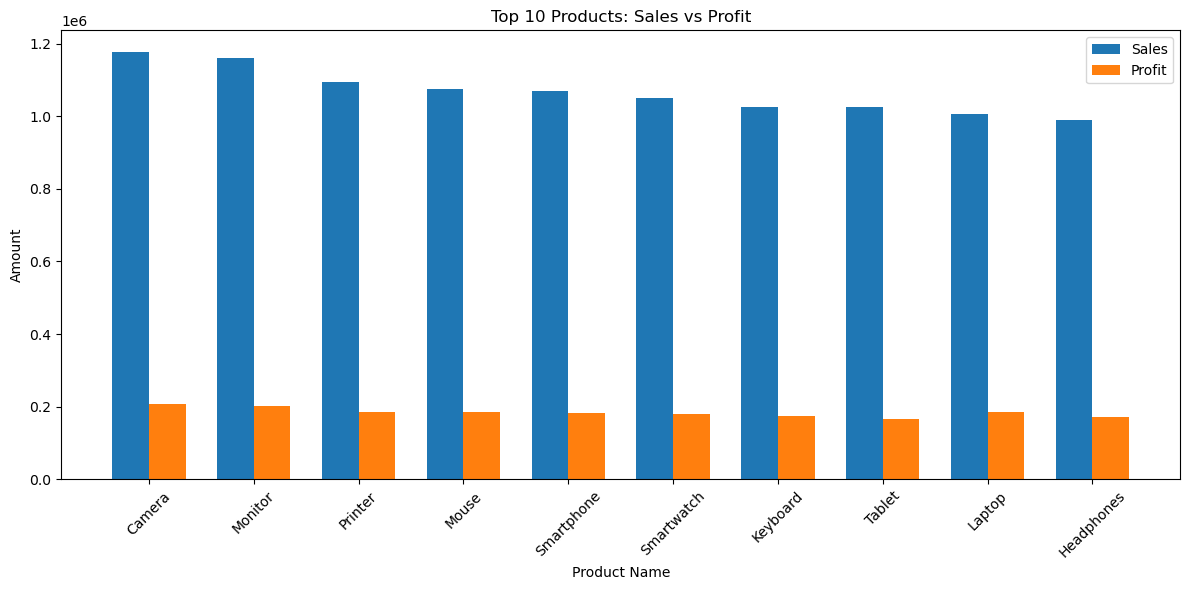

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Combine sales and profit for top 10 products by Sales
top_products = top_products_sales.index

sales_profit_df = pd.DataFrame({
    'Sales': df.groupby('Product Name')['Sales'].sum()[top_products],
    'Profit': df.groupby('Product Name')['Profit'].sum()[top_products]
})

# Plot
x = np.arange(len(top_products))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - width/2, sales_profit_df['Sales'], width, label='Sales')
plt.bar(x + width/2, sales_profit_df['Profit'], width, label='Profit')
plt.xticks(x, top_products, rotation=45)
plt.title("Top 10 Products: Sales vs Profit")
plt.xlabel("Product Name")
plt.ylabel("Amount")
plt.legend()
plt.tight_layout()
plt.show()

In [5]:
# Aggregate by Category
category_summary = df.groupby('Category').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum'
}).sort_values(by='Sales', ascending=False)

category_summary

,Sales,Profit,Quantity
Category,,,
Electronics,5326074,923185.59,8610
Accessories,4247591,736084.74,6917
Office,1094216,185394.88,1734


In [6]:
# Aggregate average profit by order quantity
quantity_profit = df.groupby('Quantity')['Profit'].mean().reset_index()
quantity_profit

,Quantity,Profit
0,1,106.509257
1,2,210.555511
2,3,317.174056
3,4,427.539365
4,5,501.585607
5,6,659.422957
6,7,739.679764
7,8,819.904043
8,9,1027.477601


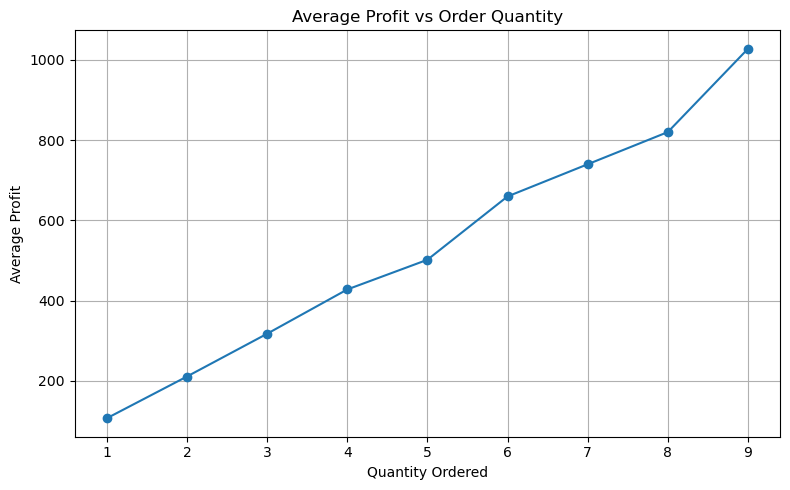

In [7]:
# Quantity vs Average Profit
plt.figure(figsize=(8,5))
plt.plot(quantity_profit['Quantity'], quantity_profit['Profit'], marker='o')
plt.title("Average Profit vs Order Quantity")
plt.xlabel("Quantity Ordered")
plt.ylabel("Average Profit")
plt.grid(True)
plt.tight_layout()
plt.show()